***Judge.me***



In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
# read 2 csv

df_set = pd.read_csv("Judge.me Assignment_Setting_logs.csv")
df_log = pd.read_csv("Judge.me Assignment_Installation_logs  (1).csv")

In [229]:
# show missing values
def missing_values(df):
    missing_data = df.isnull().sum()
    missing_percentage = (df.isnull().mean() * 100).round(2)
    return pd.DataFrame({'Missing Values': missing_data, 'Percentage (%)': missing_percentage})

# Display missing values for df_log and df_set
missing_df_log = missing_values(df_log)
missing_df_set = missing_values(df_set)

print("Missing Values in Installation Logs (df_log):")
print(missing_df_log)
print("\nMissing Values in Setting Logs (df_set):")
print(missing_df_set)


Missing Values in Installation Logs (df_log):
          Missing Values  Percentage (%)
Creat...        0            0.00       
Delet...    15820           79.29       
Downg...    19526           97.86       
ID              0            0.00       
Key             0            0.00       
Shop ID         0            0.00       
Updat...        0            0.00       
Upgra...    18676           93.60       
Shops...        0            0.00       
Shops...        0            0.00       
Shops...        0            0.00       

Missing Values in Setting Logs (df_set):
          Missing Values  Percentage (%)
key             0            0.00       
shop_id         0            0.00       
old_v...    54279           73.20       
new_v...     8264           11.14       
updat...        0            0.00       
creat...        0            0.00       
Tab             0            0.00       
Sub_tub     33634           45.36       
Section     33634           45.36       
Plan      

In [230]:
# Check data typess
print("Data Types in Installation Logs (df_log):")
print(df_log.dtypes)
print("\nData Types in Setting Logs (df_set):")
print(df_set.dtypes)


Data Types in Installation Logs (df_log):
Created At         object
Deleted At         object
Downgraded At      object
ID                  int64
Key                object
Shop ID             int64
Updated At         object
Upgraded At        object
Shops → Awesome      bool
Shops → Country    object
Shops → Plan       object
dtype: object

Data Types in Setting Logs (df_set):
key           object
shop_id        int64
old_value     object
new_value     object
updated_at    object
created_at    object
Tab           object
Sub_tub       object
Section       object
Plan          object
dtype: object


In [231]:
# Convert date columns in df_log to datetime
df_log[['Created At', 'Deleted At', 'Downgraded At', 'Updated At', 'Upgraded At']] = \
    df_log[['Created At', 'Deleted At', 'Downgraded At', 'Updated At', 'Upgraded At']].apply(pd.to_datetime, errors='coerce')

# same for df_set 
df_set[['created_at', 'updated_at']] = \
    df_set[['created_at', 'updated_at']].apply(pd.to_datetime, errors='coerce')

df_log['Created At'] = pd.to_datetime(df_log['Created At']).dt.tz_localize(None)
df_set['created_at'] = pd.to_datetime(df_set['created_at']).dt.tz_localize(None)

# check format again
print("Data Types in Installation Logs (df_log):")
print(df_log.dtypes)
print("\nData Types in Setting Logs (df_set):")
print(df_set.dtypes)


Data Types in Installation Logs (df_log):
Created At         date...
Deleted At         date...
Downgraded At      date...
ID                   int64
Key                 object
Shop ID              int64
Updated At         date...
Upgraded At        date...
Shops → Awesome       bool
Shops → Country     object
Shops → Plan        object
dtype: object

Data Types in Setting Logs (df_set):
key            object
shop_id         int64
old_value      object
new_value      object
updated_at    date...
created_at    date...
Tab            object
Sub_tub        object
Section        object
Plan           object
dtype: object


**Churn Store**

#Mark the store which has churn record


In [232]:
# Define active and inactive plans based on assignment criteria
active_plan = ['basic', 'professional', 'unlimited', 'shopify_plus']
inactive_plan = ['canceled', 'frozen', 'fraudulent']

# Create the 'Churn' column with updated conditions
df_log['Churn'] = df_log.apply(
    lambda row: (
        'Yes' if pd.notnull(row['Deleted At']) and row['Shops → Plan'] in active_plan else
        'Inactive' if pd.isnull(row['Deleted At']) and row['Shops → Plan'] in inactive_plan else
        'No'
    ), axis=1
)

# Sort the dataframe by 'ID' and display the first 10 rows to verify the result
df_log = df_log.sort_values(by='ID')
df_log[['Shop ID', 'ID', 'Deleted At', 'Shops → Plan', 'Churn']].head(10)



,Shop ID,ID,Deleted At,Shops → Plan,Churn
19888,1734261,2540556,NaT,prof...,No
16468,1734266,2540565,2024-...,basic,Yes
5898,1693122,2540580,2024-...,basic,Yes
2120,1734281,2540585,NaT,frozen,Inac...
2121,1734281,2540588,NaT,frozen,Inac...
3805,1734287,2540596,NaT,frozen,Inac...
3624,1734288,2540598,NaT,basic,No
7578,1734291,2540603,NaT,frozen,Inac...
7576,1734291,2540604,2024-...,frozen,No
44,1734293,2540607,NaT,canc...,No


In [233]:
#Caculate churn store's life time 
df_log['Lifetime_days'] = df_log.apply(
    lambda row: (row['Deleted At'] - row['Created At']).days if row['Churn'] == 'Yes' else None,
    axis=1
)

# Set lifetime to 0 for any stores with less than 1 day
df_log['Lifetime_days'] = df_log['Lifetime_days'].apply(lambda x: max(x, 0) if x is not None else None)

# Display the first few rows with the new 'Lifetime_days' column for churned stores
df_log[['Shop ID', 'ID', 'Created At', 'Deleted At', 'Churn', 'Lifetime_days']].head()




,Shop ID,ID,Created At,Deleted At,Churn,Lifetime_days
19888,1734261,2540556,2024-...,NaT,No,NaN
16468,1734266,2540565,2024-...,2024-...,Yes,2.0
5898,1693122,2540580,2024-...,2024-...,Yes,0.0
2120,1734281,2540585,2024-...,NaT,Inac...,NaN
2121,1734281,2540588,2024-...,NaT,Inac...,NaN


In [234]:
# average churn time for all churned stores
average_churn_time = df_log[df_log['Churn'] == 'Yes']['Lifetime_days'].mean()
print("Average Churn Time (in days) for all churned stores:", average_churn_time)


Average Churn Time (in days) for all churned stores: 15.778837555886737


In [235]:
from datetime import datetime
# Define the reference date for non-churned stores
reference_date = datetime(2024, 8, 23)

# Calculate lifetime for stores that did not churn
df_log['Lifetime_days'] = df_log.apply(
    lambda row: (reference_date - row['Created At']).days if row['Churn'] == 'No' else row['Lifetime_days'],
    axis=1
)

# Calculate the average lifetime for non-churned stores
average_lifetime_non_churn = df_log[df_log['Churn'] == 'No']['Lifetime_days'].mean()
print("Average Lifetime (in days) for non-churned stores:", average_lifetime_non_churn)



Average Lifetime (in days) for non-churned stores: 128.11080332409972


In [236]:
#Create Install sequence for each store.
# Sort df_log by 'Shop ID' and 'Created At' to ensure installations are in chronological order
df_log = df_log.sort_values(by=['Shop ID', 'Created At'])

# Add an 'Install Sequence' column that numbers each installation event for each store
df_log['Install Sequence'] = df_log.groupby('Shop ID').cumcount() + 1
# Sort by 'Install Sequence' in descending order for display
df_log_sorted = df_log.sort_values(by='Install Sequence', ascending=False)

# Display the first few rows to verify the ordering
print(df_log_sorted[['Shop ID', 'Created At', 'Install Sequence']].head())



       Shop ID Created At  Install Sequence
12579  1765314 2024-...          9         
12577  1765314 2024-...          8         
1732   1741919 2024-...          8         
11689  1767665 2024-...          8         
15894  1789993 2024-...          7         


In [237]:
# Calculate the lifetime of each install, using 'Deleted At' or 'final_date' if 'Deleted At' is missing
df_log['Install Lifetime'] = df_log.apply(
    lambda row: (row['Deleted At'] if pd.notnull(row['Deleted At']) else reference_date) - row['Created At'], axis=1
)

# Convert the 'Install Lifetime' to days
df_log['Install Lifetime'] = df_log['Install Lifetime'].dt.days



# Display the first few rows to verify
print(df_log[['Shop ID', 'Install Sequence', 'Install Lifetime']].head())
total_install_lifetime_average = df_log['Install Lifetime'].mean()
total_install_lifetime_median = df_log['Install Lifetime'].median()

print("Total Average Install Lifetime (in days):", total_install_lifetime_average)
print("Total median  Install Lifetime (in days):", total_install_lifetime_median)


       Shop ID  Install Sequence  Install Lifetime
1331       531        1               128         
17294     1457        1               140         
12501     1810        1               126         
18854     2365        1               125         
13449     2944        1                15         
Total Average Install Lifetime (in days): 104.60988322558012
Total median  Install Lifetime (in days): 124.0


In [238]:
# Fill any missing values in 'Tab', 'Sub_tub', and 'Section' with empty strings, then combine
df_set['Combined Setting'] = df_set['Tab'].fillna('') + ' - ' + df_set['Sub_tub'].fillna('') + ' - ' + df_set['Section'].fillna('')

# Display the first few rows to verify the new column
print(df_set[['Tab', 'Sub_tub', 'Section', 'Combined Setting']].head())

       Tab  Sub_tub  Section Combined Setting
0  3. R...  1. W...  1. W...  3. R...        
1  4. O...  2. R...  3. C...  4. O...        
2  4. O...  2. R...  4. C...  4. O...        
3  4. O...  2. R...  5. C...  4. O...        
4  Tech...      NaN      NaN  Tech...        


**EDA**
#Closer look at the data.
#First let get to know general information


In [239]:
# combine installation and setting data
df_set.rename(columns={'key': 'setting_key'}, inplace=True)
combined_df = df_log.merge(df_set, how='left', left_on='Shop ID', right_on='shop_id')
combined_df.columns, combined_df.head()

(Index(['Created At', 'Deleted At', 'Downgraded At', 'ID',
        'Key', 'Shop ID', 'Updated At', 'Upgraded At',
        'Shops → Awesome', 'Shops → Country',
        'Shops → Plan', 'Churn', 'Lifetime_days',
        'Install Sequence', 'Install Lifetime',
        'setting_key', 'shop_id', 'old_value', 'new_value',
        'updated_at', 'created_at', 'Tab', 'Sub_tub',
        'Section', 'Plan', 'Combined Setting'],
       dtype='object'),
   Created At Deleted At Downgraded At       ID   Key  \
 0 2024-...        NaT        NaT       2579429  core   
 1 2024-...        NaT        NaT       2579429  core   
 2 2024-...        NaT        NaT       2579429  core   
 3 2024-...        NaT        NaT       2579429  core   
 4 2024-...        NaT        NaT       2579429  core   
 
    Shop ID Updated At Upgraded At  Shops → Awesome  \
 0      531 2024-...   2024-...        True           
 1      531 2024-...   2024-...        True           
 2      531 2024-...   2024-...        True    

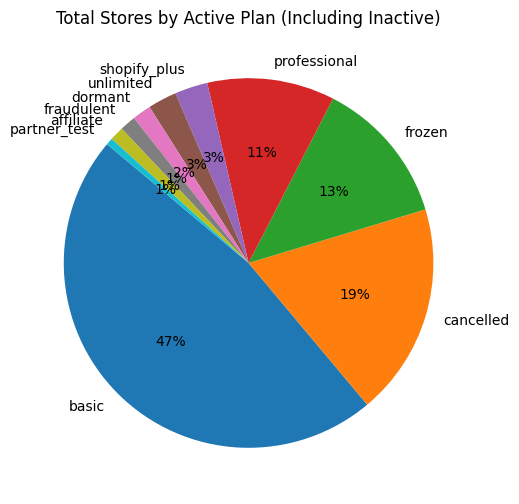

In [240]:
# Calculate total store counts broken down by active plan and filter out 0% categories
plan_counts = combined_df['Shops → Plan'].fillna('Other (including inactive)').value_counts()
total_stores = plan_counts.sum()
plan_percentages = (plan_counts / total_stores * 100).round(0).astype(int)

# Filter out categories with 0%
filtered_plan_counts = plan_counts[plan_percentages > 0]
filtered_plan_percentages = plan_percentages[plan_percentages > 0]

# Plot a pie chart with labels only for categories with non-zero percentages
plt.figure(figsize=(8, 6))
plt.pie(filtered_plan_counts, labels=filtered_plan_percentages.index, autopct='%1.0f%%', startangle=140)
plt.title("Total Stores by Active Plan (Including Inactive)")
plt.show()

In [241]:
# EDA. Overview of total data
# 1. Distinct Count of Total Stores
total_stores = combined_df['Shop ID'].nunique()
print(f"Total Distinct Stores: {total_stores}")

# 2. Percentage of Already Churned / Still Active Stores
churn_counts = combined_df[['Shop ID', 'Churn']].drop_duplicates()['Churn'].value_counts(normalize=True) * 100
print("\nPercentage of Stores Already Churned / Still Active:")
print(churn_counts)

# 3. Percentage of Stores that Ever Upgraded (overall and within Churned/Not Churned groups)
# Identify stores that have upgraded at least once
upgraded_stores = combined_df[combined_df['Upgraded At'].notnull()]['Shop ID'].nunique()
upgrade_percentage = (upgraded_stores / total_stores) * 100
print(f"\nPercentage of Stores that Ever Upgraded: {upgrade_percentage:.2f}%")

# Calculate the percentage of churned and non-churned stores that have ever upgraded
churned_stores = combined_df[combined_df['Churn'] == 'Yes']['Shop ID'].nunique()
not_churned_stores = combined_df[combined_df['Churn'] == 'No']['Shop ID'].nunique()

# Stores that have both churned and upgraded
churned_and_upgraded = combined_df[(combined_df['Churn'] == 'Yes') & (combined_df['Upgraded At'].notnull())]['Shop ID'].nunique()
# Stores that have not churned and upgraded
not_churned_and_upgraded = combined_df[(combined_df['Churn'] == 'No') & (combined_df['Upgraded At'].notnull())]['Shop ID'].nunique()

churned_upgrade_percentage = (churned_and_upgraded / churned_stores) * 100 if churned_stores > 0 else 0
not_churned_upgrade_percentage = (not_churned_and_upgraded / not_churned_stores) * 100 if not_churned_stores > 0 else 0

# Stores that have both churned and downgraded
churned_and_downgraded = combined_df[(combined_df['Churn'] == 'Yes') & (combined_df['Downgraded At'].notnull())]['Shop ID'].nunique()
# Stores that have not churned and downgraded
not_churned_and_downgraded = combined_df[(combined_df['Churn'] == 'No') & (combined_df['Downgraded At'].notnull())]['Shop ID'].nunique()

# Calculate the total number of churned and non-churned stores
churned_stores = combined_df[combined_df['Churn'] == 'Yes']['Shop ID'].nunique()
not_churned_stores = combined_df[combined_df['Churn'] == 'No']['Shop ID'].nunique()

# Calculate percentages
churned_downgrade_percentage = (churned_and_downgraded / churned_stores) * 100 if churned_stores > 0 else 0
not_churned_downgrade_percentage = (not_churned_and_downgraded / not_churned_stores) * 100 if not_churned_stores > 0 else 0

print("Percentage of Stores that Ever Downgraded (by Churn Status):")
print(f"Churned Stores: {churned_downgrade_percentage:.2f}%")
print(f"Not Churned Stores: {not_churned_downgrade_percentage:.2f}%")


print("\nPercentage of Stores that Ever Upgraded (by Churn Status):")
print(f"Churned Stores: {churned_upgrade_percentage:.2f}%")
print(f"Not Churned Stores: {not_churned_upgrade_percentage:.2f}%")

# 4. Average Settings Changed per Store (Total, Churned, Not Churned)
settings_count_per_store = combined_df.groupby('Shop ID')['setting_key'].count()
avg_settings_total = settings_count_per_store.mean()
avg_settings_churned = settings_count_per_store[combined_df[combined_df['Churn'] == 'Yes']['Shop ID'].unique()].mean()
avg_settings_not_churned = settings_count_per_store[combined_df[combined_df['Churn'] == 'No']['Shop ID'].unique()].mean()

print("\nAverage Settings Changed per Store:")
print(f"Total: {avg_settings_total:.2f}")
print(f"Churned: {avg_settings_churned:.2f}")
print(f"Not Churned: {avg_settings_not_churned:.2f}")

# 5. Percentage of Stores that Ever Used a Paid Function (Plan: "Awesome")
paid_function_percentage = combined_df[combined_df['Plan'] == 'Awesome']['Shop ID'].nunique() / total_stores * 100
print(f"\nPercentage of Stores that Ever Used a Paid Function: {paid_function_percentage:.2f}%")

Total Distinct Stores: 16970

Percentage of Stores Already Churned / Still Active:
Churn
No          65.9...
Inactive    18.3...
Yes         15.7...
Name: proportion, dtype: float64

Percentage of Stores that Ever Upgraded: 7.48%
Percentage of Stores that Ever Downgraded (by Churn Status):
Churned Stores: 8.03%
Not Churned Stores: 1.04%

Percentage of Stores that Ever Upgraded (by Churn Status):
Churned Stores: 8.03%
Not Churned Stores: 8.44%

Average Settings Changed per Store:
Total: 5.55
Churned: 6.71
Not Churned: 6.26

Percentage of Stores that Ever Used a Paid Function: 4.83%


In [242]:
# Calculate the average number of installs per store
average_installs_per_store = df_log.groupby('Shop ID')['Install Sequence'].max().mean()

print("Average installs per store:", average_installs_per_store)
total_installs = df_log['Install Sequence'].count()

print("Total Number of Installs:", total_installs)


Average installs per store: 1.1757807896287567
Total Number of Installs: 19953


In [243]:
# Calculate the number of stores that have ever deleted the app
stores_ever_deleted = df_log[df_log['Deleted At'].notnull()]['Shop ID'].nunique()

# Calculate the total number of unique stores
total_stores = df_log['Shop ID'].nunique()

# Calculate the percentage of stores that have ever deleted the app
percentage_deleted = (stores_ever_deleted / total_stores) * 100

print("Percentage of Total Stores that Ever Deleted the App:", percentage_deleted)

Percentage of Total Stores that Ever Deleted the App: 19.61107837360047


In [244]:
#Most used feature
# Calculate the number of events per store and find the store with the most events

event_counts = combined_df['Shop ID'].value_counts()
breakdown = combined_df.groupby(['Shops → Plan', 'Plan', 'Key', 'Churn']).size().reset_index(name='Event_Count')


In [245]:
# Count occurrences of each unique 'Key' in the combined dataset and calculate the percentage
top_events = combined_df['setting_key'].value_counts().head(15)
top_events_percentage = (top_events / top_events.sum() * 100).round(2)

# Combine counts and percentages into a DataFrame for a clear display
top_events_df = pd.DataFrame({
    'Event_Count': top_events,
    'Percentage (%)': top_events_percentage
})

print("Top 15 Most Used Events:")
print(top_events_df)

Top 15 Most Used Events:
          Event_Count  Percentage (%)
setti...                             
shopi...    16257        26.74       
revie...    12331        20.28       
previ...    10426        17.15       
widge...     8618        14.18       
widge...     2487         4.09       
featu...     1602         2.64       
ali_i...     1454         2.39       
badge...     1406         2.31       
featu...     1084         1.78       
wait_...     1044         1.72       
custo...      957         1.57       
autop...      816         1.34       
ali_i...      807         1.33       
hide_...      764         1.26       
widge...      743         1.22       


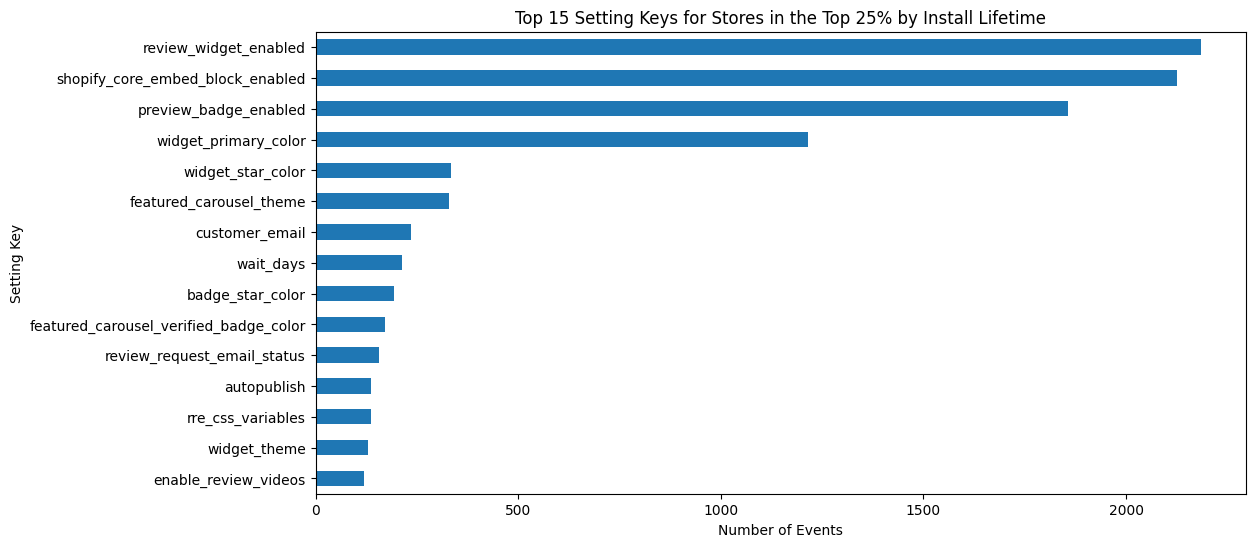

In [246]:
# Find the top 15 most common 'setting_key' events for top-lifetime stores
top_setting_keys = top_lifetime_stores['setting_key'].value_counts().head(15)

# Plot the top 15 setting keys as a histogram
plt.figure(figsize=(12, 6))
top_setting_keys.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 15 Setting Keys for Stores in the Top 25% by Install Lifetime")
plt.xlabel("Number of Events")
plt.ylabel("Setting Key")
plt.show()

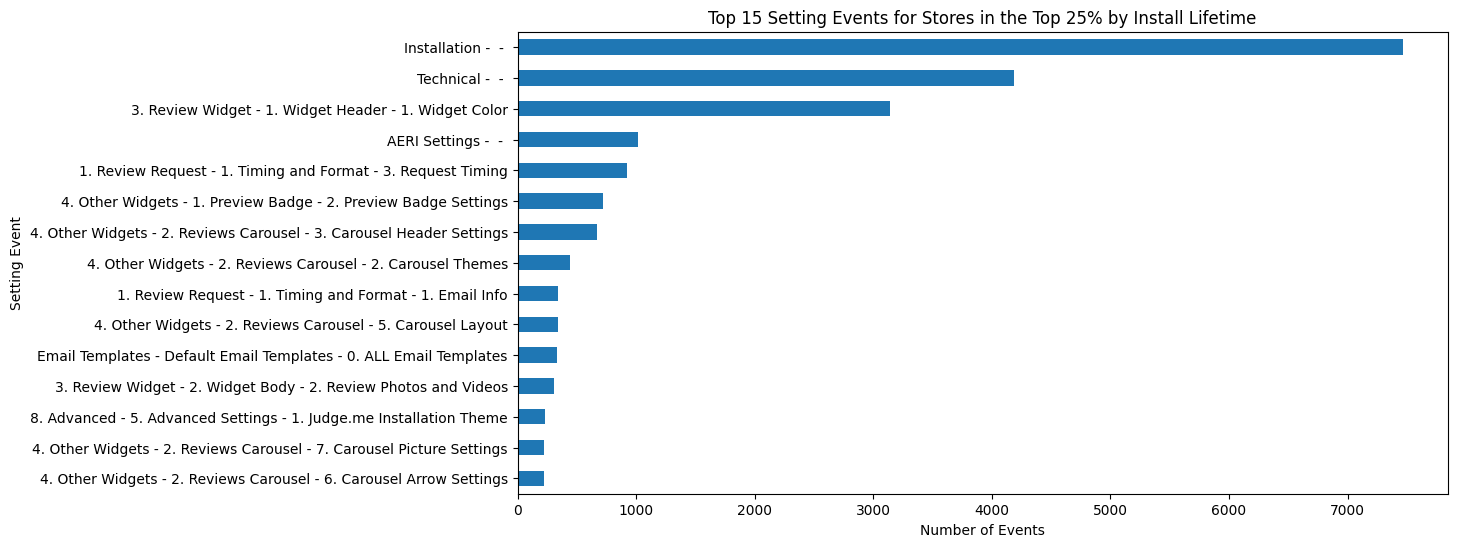

In [247]:
# Plot the top 15 setting events as a horizontal bar chart

# Filter top 25% of stores by highest Install Lifetime
install_lifetime_cutoff = combined_df['Install Lifetime'].quantile(0.75)
top_lifetime_stores = combined_df[combined_df['Install Lifetime'] >= install_lifetime_cutoff]

# Find the top 15 most common 'Combined Setting' events for these top-lifetime stores
top_setting_events = top_lifetime_stores['Combined Setting'].value_counts().head(15)
plt.figure(figsize=(12, 6))
top_setting_events.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 15 Setting Events for Stores in the Top 25% by Install Lifetime")
plt.xlabel("Number of Events")
plt.ylabel("Setting Event")
plt.show()

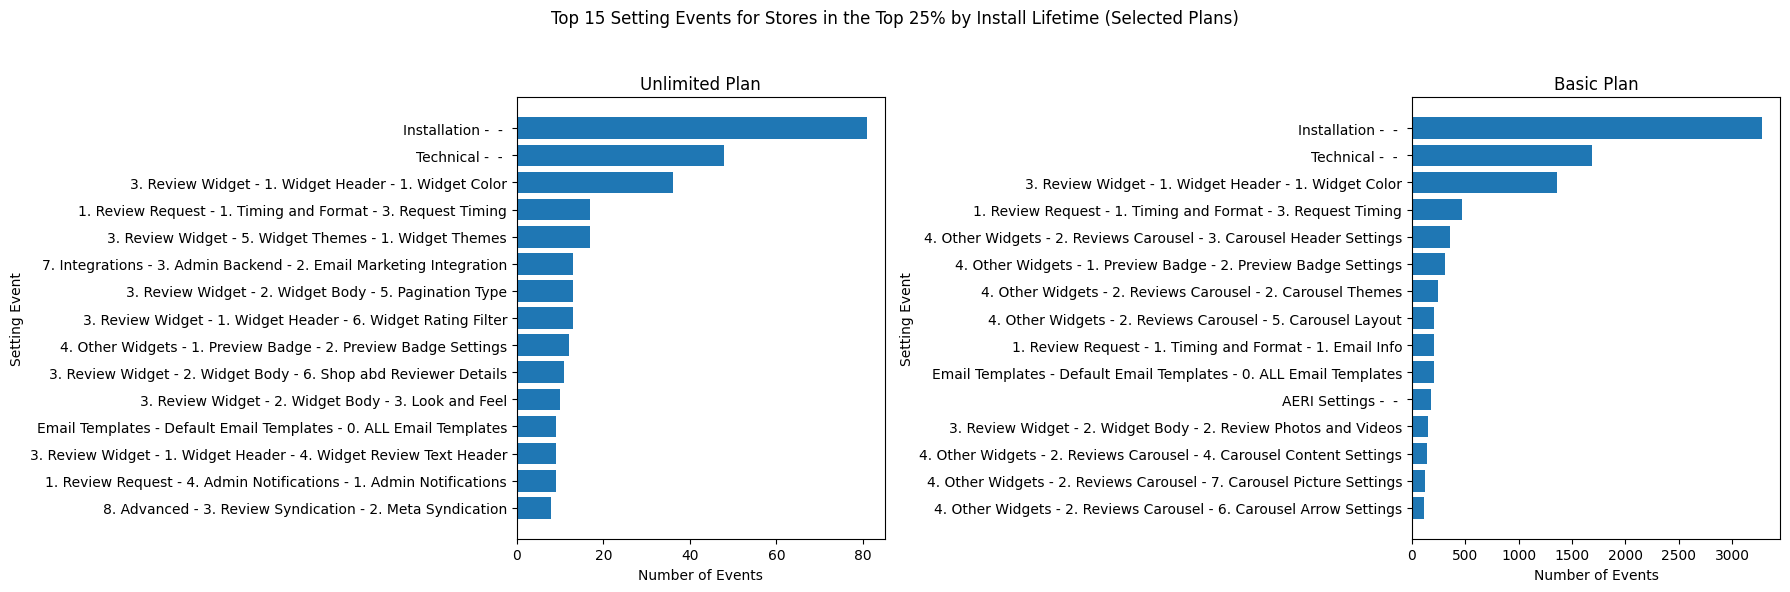

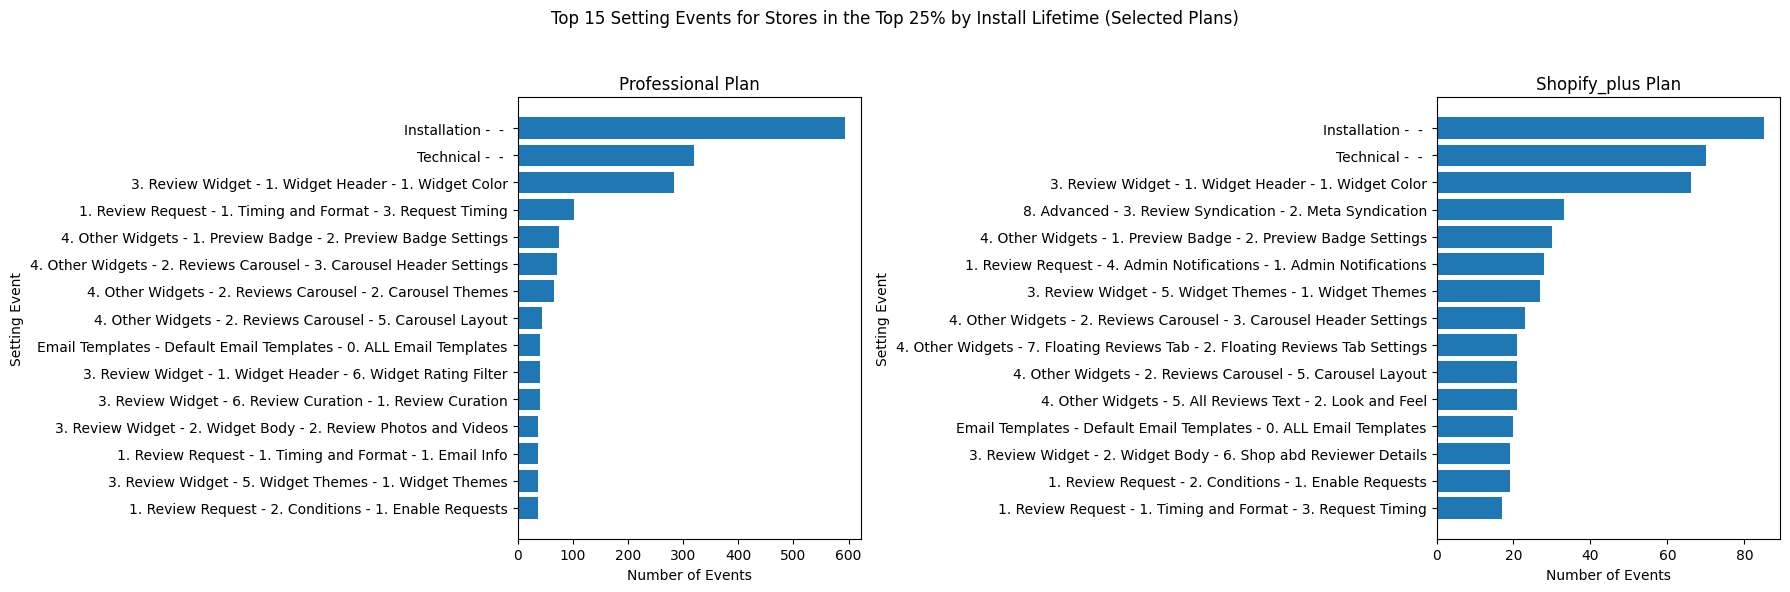

In [248]:
import matplotlib.pyplot as plt

# Define the specific plans to include
selected_plans = ['basic', 'professional', 'unlimited', 'shopify_plus', 'canceled']

# Filter top 25% of stores by highest Install Lifetime and selected plans
install_lifetime_cutoff = combined_df['Install Lifetime'].quantile(0.75)
top_lifetime_stores = combined_df[
    (combined_df['Install Lifetime'] >= install_lifetime_cutoff) &
    (combined_df['Shops → Plan'].isin(selected_plans))
]

# Unique active plans to loop through within the selected plans
filtered_plans = top_lifetime_stores['Shops → Plan'].unique()

# Set the number of charts per row
charts_per_row = 2
num_plans = len(filtered_plans)

# Loop through each filtered plan, creating a new row for every 3 charts
for i in range(0, num_plans, charts_per_row):
    # Determine the active plans for the current row
    plans_row = filtered_plans[i:i + charts_per_row]
    
    # Create subplots with one row and up to 3 columns
    fig, axes = plt.subplots(1, len(plans_row), figsize=(18, 6))
    fig.suptitle("Top 15 Setting Events for Stores in the Top 25% by Install Lifetime (Selected Plans)")
    
    for j, plan in enumerate(plans_row):
        # Filter data for the specific active plan
        plan_data = top_lifetime_stores[top_lifetime_stores['Shops → Plan'] == plan]
        
        # Find the top 15 most common 'Combined Setting' events for the current plan, sorted by count
        top_setting_events = plan_data['Combined Setting'].value_counts().head(15).sort_values(ascending=True)
        
        # Plot each chart in the respective subplot
        axes[j].barh(top_setting_events.index, top_setting_events.values)
        axes[j].set_title(f"{plan.capitalize()} Plan")
        axes[j].set_xlabel("Number of Events")
        axes[j].set_ylabel("Setting Event")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
    plt.show()


In [249]:
# Calculate the total number of churned stores
total_churned_stores = combined_df[combined_df['Churn'] == 'Yes']['Shop ID'].nunique()

# Calculate the number of churned stores that have ever upgraded
churned_and_upgraded_stores = combined_df[(combined_df['Churn'] == 'Yes') & (combined_df['Upgraded At'].notnull())]['Shop ID'].nunique()

print("Total Churned Stores:", total_churned_stores)
print("Total Churned Stores that Ever Upgraded:", churned_and_upgraded_stores)


Total Churned Stores: 2739
Total Churned Stores that Ever Upgraded: 220


***Churn Deep Dive***

In [262]:
# Filter for churned and non-churned stores
churned_data = combined_df[combined_df['Churn'] == 'Yes']
non_churned_data = combined_df[combined_df['Churn'] == 'No']

# Calculate total unique stores for each category
total_churned_stores = churned_data['ID'].nunique()
total_non_churned_stores = non_churned_data['ID'].nunique()

# 1. Average lifetime days
avg_lifetime_churned = churned_data.groupby('ID')['Install Lifetime'].max().mean()
avg_lifetime_non_churned = non_churned_data.groupby('ID')['Install Lifetime'].max().mean()

# 2. Average setting changes over lifetime
avg_settings_churned = churned_data.groupby('ID')['setting_key'].count().mean()
avg_settings_non_churned = non_churned_data.groupby('ID')['setting_key'].count().mean()

# 3. Total installs (unique installs)
total_installs_churned = total_churned_stores
total_installs_non_churned = total_non_churned_stores

# 4. % Using Free Setting
free_setting_churned = churned_data[churned_data['Plan'] == 'Free']['ID'].nunique() / total_churned_stores * 100
free_setting_non_churned = non_churned_data[non_churned_data['Plan'] == 'Free']['ID'].nunique() / total_non_churned_stores * 100

# 5. % Using Paid Setting
paid_setting_churned = churned_data[churned_data['Plan'] == 'Awesome']['ID'].nunique() / total_churned_stores * 100
paid_setting_non_churned = non_churned_data[non_churned_data['Plan'] == 'Awesome']['ID'].nunique() / total_non_churned_stores * 100

# 6. % Who Ever Upgraded
ever_upgraded_churned = churned_data[churned_data['Upgraded At'].notnull()]['ID'].nunique() / total_churned_stores * 100
ever_upgraded_non_churned = non_churned_data[non_churned_data['Upgraded At'].notnull()]['ID'].nunique() / total_non_churned_stores * 100

# 7. % Who Ever Downgraded
ever_downgraded_churned = churned_data[churned_data['Downgraded At'].notnull()]['ID'].nunique() / total_churned_stores * 100
ever_downgraded_non_churned = non_churned_data[non_churned_data['Downgraded At'].notnull()]['ID'].nunique() / total_non_churned_stores * 100

# Organize metrics for churned and non-churned stores
churned_metrics = [
    round(avg_lifetime_churned, 2),
    round(avg_settings_churned, 2),
    total_installs_churned,
    f"{free_setting_churned:.2f}%",
    f"{paid_setting_churned:.2f}%",
    f"{ever_upgraded_churned:.2f}%",
    f"{ever_downgraded_churned:.2f}%"
]

non_churned_metrics = [
    round(avg_lifetime_non_churned, 2),
    round(avg_settings_non_churned, 2),
    total_installs_non_churned,
    f"{free_setting_non_churned:.2f}%",
    f"{paid_setting_non_churned:.2f}%",
    f"{ever_upgraded_non_churned:.2f}%",
    f"{ever_downgraded_non_churned:.2f}%"
]

# Compile metrics into a DataFrame for a matrix view
metrics_dict = {
    'Metric': [
        'Average Lifetime (days)', 
        'Average Setting Changes', 
        'Total Installs', 
        '% Using Free Setting', 
        '% Using Paid Setting', 
        '% Who Ever Upgraded', 
        '% Who Ever Downgraded'
    ],
    'Churned Stores': churned_metrics,
    'Non-Churned Stores': non_churned_metrics
}

# Create a DataFrame from the metrics dictionary for a matrix view
comparison_matrix_df = pd.DataFrame(metrics_dict).set_index('Metric')

# Display the matrix DataFrame
comparison_matrix_df


,Churned Stores,Non-Churned Stores
Metric,,
Average Lifetime (days),15.78,127.59
Average Setting Changes,4.64,5.56
Total Installs,3355,8040
% Using Free Setting,66.97%,77.65%
% Using Paid Setting,6.32%,7.09%
% Who Ever Upgraded,6.59%,10.96%
% Who Ever Downgraded,6.59%,0.50%


In [251]:
#break down by plan
# Set display options to make columns more compact
pd.set_option('display.max_colwidth', 8)  # Adjust width as needed
pd.set_option('display.width', 60)  # Set the total display width

# Define active plans
active_plans = ['basic', 'professional', 'unlimited', 'shopify_plus', 'canceled']

# Initialize a dictionary to store each metric by plan and churn status
metrics = {
    'Total Install Count': [],
    '% of Subtotal': [],
    'Average Setting Key Events': [],
    'Average Lifetime (days)': [],
    '% Who Ever Upgraded': [],
    '% Who Ever Downgrade': []
}

# Loop through each active plan and churn status to calculate metrics
for plan in active_plans:
    # Get the total install count for the current plan to calculate percentages
    total_installs_for_plan = combined_df[combined_df['Shops → Plan'] == plan]['ID'].nunique()

    for churn_status in ['Yes', 'No']:
        # Filter the data by plan and churn status
        plan_data = combined_df[(combined_df['Shops → Plan'] == plan) & (combined_df['Churn'] == churn_status)]
        install_count = plan_data['ID'].nunique()  # Total installs for this plan and churn status

        # Calculate metrics for the current plan and churn status
        percentage_of_subtotal = int(install_count / total_installs_for_plan * 100) if total_installs_for_plan > 0 else 0
        average_setting_key_events = plan_data.groupby('ID')['setting_key'].count().mean() if install_count > 0 else 0
        average_lifetime = plan_data['Install Lifetime'].mean() if install_count > 0 else 0
        percentage_upgraded = int(
            plan_data[plan_data['Upgraded At'].notnull()]['ID'].nunique() / install_count * 100
        ) if install_count > 0 else 0
        percentage_downgraded = int(
            plan_data[plan_data['Downgraded At'].notnull()]['ID'].nunique() / install_count * 100
        ) if install_count > 0 else 0

        # Append the metrics for this plan and churn status, formatting percentage columns
        metrics['Total Install Count'].append(install_count)
        metrics['% of Subtotal'].append(f"{percentage_of_subtotal}%")
        metrics['Average Setting Key Events'].append(round(average_setting_key_events, 2))
        metrics['Average Lifetime (days)'].append(round(average_lifetime, 2))
        metrics['% Who Ever Upgraded'].append(f"{percentage_upgraded}%")
        metrics['% Who Ever Downgrade'].append(f"{percentage_downgraded}%")

# Create a DataFrame with MultiIndex for active plan and churn status
index = pd.MultiIndex.from_product([active_plans, ['Yes', 'No']], names=['Active Plan', 'Churn Status'])
churn_matrix_df = pd.DataFrame(metrics, index=index)

# Display the matrix DataFrame with compact columns
churn_matrix_df



Total Install Count % of Subtotal  \
Activ... Churn...                                      
basic    Yes          2805                  30%        
         No           6469                  69%        
profe... Yes           402                  25%        
         No           1185                  74%        
unlim... Yes            91                  33%        
         No            181                  66%        
shopi... Yes            57                  21%        
         No            205                  78%        
canceled Yes             0                   0%        
         No              0                   0%        

                   Average Setting Key Events  \
Activ... Churn...                               
basic    Yes          4.47                      
         No           4.91                      
profe... Yes          5.38                      
         No           7.22                      
unlim... Yes          4.92                      
         No          11.00                      
shopi... Yes          7.35                      
         No          11.63                      
canceled Yes          0.00                      
         No           0.00                      

                   Average Lifetime (days)  \
Activ... Churn...                            
basic    Yes         19.13                   
         No         129.61                   
profe... Yes         19.44                   
         No         128.55                   
unlim... Yes         18.50                   
         No         126.44                   
shopi... Yes         24.31                   
         No         130.84                   
canceled Yes          0.00                   
         No           0.00                   

                  % Who Ever Upgraded % Who Ever Downgrade  
Activ... Churn...                                           
basic    Yes            5%                  5%              
         No             6%                  0%              
profe... Yes           13%                 13%              
         No            22%                  0%              
unlim... Yes            8%                  8%              
         No            45%                  0%              
shopi... Yes           26%                 26%              
         No            50%                  0%              
canceled Yes            0%                  0%              
         No             0%                  0%

In [255]:


# Calculate the time difference (in days) between the install date ('Created At') and each setting event date ('created_at')
combined_df['Days Since Install'] = (combined_df['created_at'] - combined_df['Created At']).dt.days

# Filter events that occurred within the first 15 days of installation
first_15_days_df = combined_df[combined_df['Days Since Install'] <= 15]

# Group by 'Churn' and calculate the average setting key events within the first 15 days
average_setting_key_events_15_days = first_15_days_df.groupby('Churn')['setting_key'].count() / first_15_days_df.groupby('Churn')['ID'].nunique()

# Convert the result to a DataFrame for readability
average_setting_key_events_15_days_df = average_setting_key_events_15_days.reset_index()
average_setting_key_events_15_days_df.columns = ['Churn Status', 'Average Setting Key Events in First 15 Days']

# Display the DataFrame
average_setting_key_events_15_days_df



,Churn Status,Average Setting Key Events in First 15 Days
0,No,6.96...
1,Yes,6.69...


In [260]:


# Filter events that occurred within the first 15 days, first 7 days, and first 1 day of installation
first_15_days_df = combined_df[combined_df['Days Since Install'] <= 15]
first_7_days_df = combined_df[combined_df['Days Since Install'] <= 7]
first_day_df = combined_df[combined_df['Days Since Install'] <= 1]

# Initialize dictionaries to store rates
overall_rates = {'Upgrade Rate': {}, 'Downgrade Rate': {}}
first_15_days_rates = {'Upgrade Rate': {}, 'Downgrade Rate': {}}
first_7_days_rates = {'Upgrade Rate': {}, 'Downgrade Rate': {}}
first_day_rates = {'Upgrade Rate': {}, 'Downgrade Rate': {}}

# Loop over each churn status to calculate rates
for churn_status in ['Yes', 'No']:
    # Filter data for the current churn status
    churn_data = combined_df[combined_df['Churn'] == churn_status]
    first_15_days_churn_data = first_15_days_df[first_15_days_df['Churn'] == churn_status]
    first_7_days_churn_data = first_7_days_df[first_7_days_df['Churn'] == churn_status]
    first_day_churn_data = first_day_df[first_day_df['Churn'] == churn_status]

    # Calculate total installs for this churn status
    total_installs = churn_data['ID'].nunique()

    # Overall rates
    overall_upgrade_rate = churn_data[churn_data['Upgraded At'].notnull()]['ID'].nunique() / total_installs * 100
    overall_downgrade_rate = churn_data[churn_data['Downgraded At'].notnull()]['ID'].nunique() / total_installs * 100

    # First 15 days rates
    first_15_days_upgrade_rate = first_15_days_churn_data[first_15_days_churn_data['Upgraded At'].notnull()]['ID'].nunique() / total_installs * 100
    first_15_days_downgrade_rate = first_15_days_churn_data[first_15_days_churn_data['Downgraded At'].notnull()]['ID'].nunique() / total_installs * 100

    # First 7 days rates
    first_7_days_upgrade_rate = first_7_days_churn_data[first_7_days_churn_data['Upgraded At'].notnull()]['ID'].nunique() / total_installs * 100
    first_7_days_downgrade_rate = first_7_days_churn_data[first_7_days_churn_data['Downgraded At'].notnull()]['ID'].nunique() / total_installs * 100

    # First day rates
    first_day_upgrade_rate = first_day_churn_data[first_day_churn_data['Upgraded At'].notnull()]['ID'].nunique() / total_installs * 100
    first_day_downgrade_rate = first_day_churn_data[first_day_churn_data['Downgraded At'].notnull()]['ID'].nunique() / total_installs * 100

    # Store results
    overall_rates['Upgrade Rate'][churn_status] = f"{overall_upgrade_rate:.2f}%"
    overall_rates['Downgrade Rate'][churn_status] = f"{overall_downgrade_rate:.2f}%"
    first_15_days_rates['Upgrade Rate'][churn_status] = f"{first_15_days_upgrade_rate:.2f}%"
    first_15_days_rates['Downgrade Rate'][churn_status] = f"{first_15_days_downgrade_rate:.2f}%"
    first_7_days_rates['Upgrade Rate'][churn_status] = f"{first_7_days_upgrade_rate:.2f}%"
    first_7_days_rates['Downgrade Rate'][churn_status] = f"{first_7_days_downgrade_rate:.2f}%"
    first_day_rates['Upgrade Rate'][churn_status] = f"{first_day_upgrade_rate:.2f}%"
    first_day_rates['Downgrade Rate'][churn_status] = f"{first_day_downgrade_rate:.2f}%"

# Convert results to DataFrames for display
overall_rates_df = pd.DataFrame(overall_rates).T.rename(columns={'Yes': 'Churned', 'No': 'Not Churned'})
first_15_days_rates_df = pd.DataFrame(first_15_days_rates).T.rename(columns={'Yes': 'Churned', 'No': 'Not Churned'})
first_7_days_rates_df = pd.DataFrame(first_7_days_rates).T.rename(columns={'Yes': 'Churned', 'No': 'Not Churned'})
first_day_rates_df = pd.DataFrame(first_day_rates).T.rename(columns={'Yes': 'Churned', 'No': 'Not Churned'})

# Combine the DataFrames for a full view of results in the desired order
rates_df = pd.concat([overall_rates_df, first_day_rates_df, first_7_days_rates_df, first_15_days_rates_df], 
                     keys=['Overall Rates', 'First Day Rates', 'First 7 Days Rates', 'First 15 Days Rates'])

# Display the DataFrame
rates_df

Churned Not Churned
Overa... Upgra...   6.59%   10.96%   
         Downg...   6.59%    0.50%   
First... Upgra...   5.25%    8.72%   
         Downg...   5.25%    0.40%   
First... Upgra...   5.84%    9.61%   
         Downg...   5.84%    0.44%   
First... Upgra...   5.99%    9.85%   
         Downg...   5.99%    0.45%